# ORIE 5258 / Homework  4: Bayesian Analysis

#### Students: Vishakha Korde (vk369) and Luis Alonso Cendra Villalobos (lc2234)

# Sample 1
**Stocks chosen:** AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM

**Stock to be predicted:** AAPL

**Time series:**

Start = 1/1/2018

End = 11/04/2023

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import shift


In [5]:
# creating pandas dataframe for each stock

path = '/content/drive/MyDrive/ORIE5258 - Python for Finance/HW3/'

AAPL = pd.read_csv(path + 'AAPL.csv')
AAPL.Name = 'AAPL'
AMZN = pd.read_csv(path + 'AMZN.csv')
AMZN.Name = 'AMZN'
AVGO = pd.read_csv(path + 'AVGO.csv')
AVGO.Name = 'AVGO'
BRK  = pd.read_csv(path + 'BRK.csv')
BRK.Name = 'BRK'
GOOG = pd.read_csv(path + 'GOOG.csv')
GOOG.Name = 'GOOG'
HD   = pd.read_csv(path + 'HD.csv')
HD.Name = 'HD'
JNJ  = pd.read_csv(path + 'JNJ.csv')
JNJ.Name = 'JNJ'
JPM  = pd.read_csv(path + 'JPM.csv')
JPM.Name = 'JPM'
LLY  = pd.read_csv(path + 'LLY.csv')
LLY.Name = 'LLY'
MA   = pd.read_csv(path + 'MA.csv')
MA.Name = 'MA'
META = pd.read_csv(path + 'META.csv')
META.Name = 'META'
MSFT = pd.read_csv(path + 'MSFT.csv')
MSFT.Name = 'MSFT'
NVDA = pd.read_csv(path + 'NVDA.csv')
NVDA.Name = 'NVDA'
ORCL = pd.read_csv(path + 'ORCL.csv')
ORCL.Name = 'ORCL'
PG   = pd.read_csv(path + 'PG.csv')
PG.Name = 'PG'
TSLA = pd.read_csv(path + 'TSLA.csv')
TSLA.Name = 'TSLA'
UNH  = pd.read_csv(path + 'UNH.csv')
UNH.Name = 'UNH'
V    = pd.read_csv(path + 'V.csv')
V.Name = 'V'
WMT  = pd.read_csv(path + 'WMT.csv')
WMT.Name = 'WMT'
XOM  = pd.read_csv(path + 'XOM.csv')
XOM.Name = 'XOM'

In [6]:
# List of stocks
dataframes = [AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM]

# Filter Adj Cls for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close']

In [7]:
# Merge DataFrames for all asset prices
for df in dataframes:
  asset_prices = pd.concat([AAPL['Date'], AAPL['AAPL'], AMZN['AMZN'], AVGO['AVGO'], BRK['BRK'], GOOG['GOOG'], HD['HD'],
              JNJ['JNJ'], JPM['JPM'], LLY['LLY'], MA['MA'], META['META'], MSFT['MSFT'],
              NVDA['NVDA'], ORCL['ORCL'], PG['PG'], TSLA['TSLA'], UNH['UNH'], V['V'],
              WMT['WMT'], XOM['XOM']], axis=1)

# Calculate returns data for 1 day window

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close'].shift(-1) / df['Adj Close'] - 1



In [8]:
# Merge DataFrames for all asset returns
asset_returns = pd.concat([AAPL['Date'].shift(-1), AAPL['AAPL'].shift(1), AAPL['AAPL'], AMZN['AMZN'], AVGO['AVGO'], BRK['BRK'], GOOG['GOOG'], HD['HD'],
              JNJ['JNJ'], JPM['JPM'], LLY['LLY'], MA['MA'], META['META'], MSFT['MSFT'],
              NVDA['NVDA'], ORCL['ORCL'], PG['PG'], TSLA['TSLA'], UNH['UNH'], V['V'],
              WMT['WMT'], XOM['XOM']], axis=1)


# Rename the lagged column for AAPL
asset_returns.columns.values[1] = 'AAPL_Lag1'
AAPL_Lag1 = AAPL.shift(1)
AAPL_Lag1.Name = 'AAPL_Lag1'
dataframes.append(AAPL_Lag1)
# Fill NaN values with zeros
asset_returns = asset_returns.fillna(0)

#Remove the first line because AAPL_Lag1 has a zero there
asset_returns = asset_returns.iloc[1:]

#Remove the last line because its filled with zeros
asset_returns = asset_returns.iloc[:-1]

# Print the asset returns
print(asset_returns.iloc[:, :])


            Date  AAPL_Lag1      AAPL      AMZN      AVGO       BRK      GOOG  \
1     2018-01-04  -0.000174  0.004645  0.004476  0.000333  0.004505  0.003621   
2     2018-01-05   0.004645  0.011386  0.016163  0.005926  0.003637  0.014571   
3     2018-01-08   0.011386 -0.003714  0.014425  0.002393  0.006554  0.004273   
4     2018-01-09  -0.003714 -0.000115  0.004676 -0.013847  0.001381 -0.000614   
5     2018-01-10  -0.000115 -0.000229  0.001301 -0.021117  0.012757 -0.003299   
...          ...        ...       ...       ...       ...       ...       ...   
1465  2023-10-30   0.007969  0.012305  0.038907  0.003447  0.017184  0.019044   
1466  2023-10-31   0.012305  0.002819  0.002863  0.000143  0.011618 -0.003579   
1467  2023-11-01   0.002819  0.018739  0.029379  0.013751  0.007090  0.018116   
1468  2023-11-02   0.018739  0.020693  0.007810  0.021526  0.015331  0.007917   
1469  2023-11-03   0.020693 -0.005181  0.003839  0.013061  0.007994  0.013921   

            HD       JNJ   

In [9]:
from datetime import datetime, timedelta

def rolling_window(StartDate, window):

  StartDate = datetime.strptime(StartDate, '%Y-%m-%d')

  # Add window days to the StartDate
  EndDate = StartDate + timedelta(days=window)

  # Convert the result back to a string if needed
  StartDateStr = StartDate.strftime('%Y-%m-%d')

  # Convert the result back to a string if needed
  EndDateStr = EndDate.strftime('%Y-%m-%d')

  # Set EndDateStr as the minimum of itself and '2023-11-02' (second to last date in dataset)
  EndDateStr = min(EndDateStr, '2023-11-02')

  return StartDateStr, EndDateStr

 Index_start:  Index_end:    P(X):  P(A1,A2,...A5 | X):  [P(A1) P(A2) … P(A5)] denominator  P(predict)=P(X|A1,A2,...A5):  P(actual):
            0          20 0.421053                 0.00                       1.261518e-04                  0.000000e+00    0.473684
            1          21 0.450000                 0.00                       9.996727e-05                  0.000000e+00    0.500000
            2          22 0.500000                 0.00                       2.747697e-05                  0.000000e+00    0.450000
            3          23 0.450000                 0.00                       5.694839e-06                  0.000000e+00    0.400000
            4          24 0.400000                 0.00                       6.940585e-06                  0.000000e+00    0.450000
            5          25 0.450000                 0.00                       6.026333e-06                  0.000000e+00    0.450000
            6          26 0.450000                 0.00              

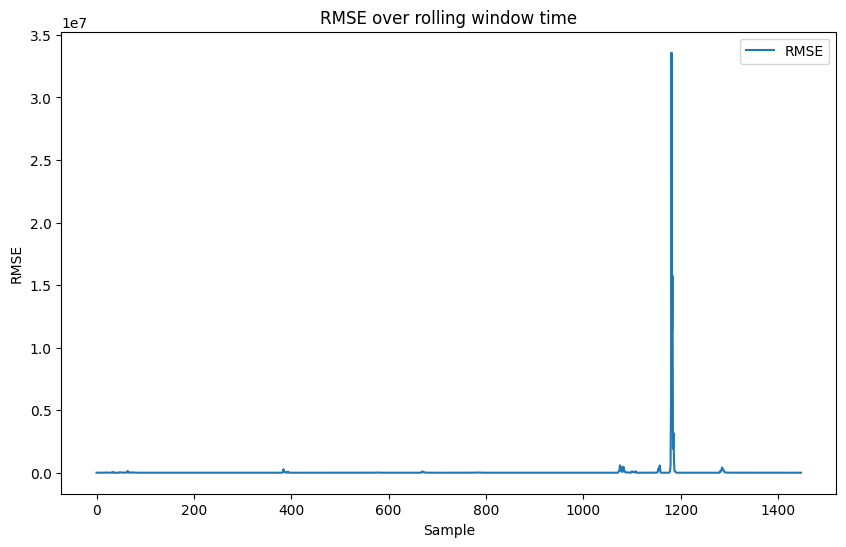

In [10]:
# Create lists to store results
results = []
rmse_list = []

for i in range(len(asset_returns)+1):

  data_test= pd.DataFrame()
  data_train = pd.DataFrame()
  y_train = pd.DataFrame()
  X_train = pd.DataFrame()

  #Split data into two sets as a rolling window of 11 days (approx two weeks)
  data_test, data_train = [d for _, d in asset_returns.groupby((asset_returns.index <= i+20) & (asset_returns.index >= i))]
  data_test = data_test.iloc[0]

  # training data (Until September 29th, 2023)
  y_train = pd.DataFrame(data_train['AAPL_Lag1'])  # AAPL to predict
  X_train = pd.DataFrame(data_train.iloc[:, 1:])    # All instruments
  X_train = X_train[:-1] #Eliminate one row to match shapes with y


  # testing data (October 1st - Nov 3rd, 2023)
  y_test = float(data_test.iloc[1:2])  # AAPL = N-th Asset. We shift ahead to make y_t regression on x_t-1
  # X_test = pd.DataFrame(data_test.iloc[:, 1:])    # All 20 instruments
  # X_test = X_test[:-1]#Eliminate one row to match shapes with y

  unconditionalprob_df_train = pd.DataFrame(columns=['UnconditionalP_t_train'])

  for df in dataframes:
    UnconditionalP_t = len(X_train.loc[X_train[df.Name] > 0])/len(X_train)
    unconditionalprob_df_train.loc[df.Name] = UnconditionalP_t

  ConditionalP = 1
  dfs = X_train.copy()

  for df in dataframes:

    if(df.Name != 'AAPL_Lag1' and df.Name != 'AAPL'):
      dfs = dfs.loc[dfs[df.Name] > 0].copy()
    # dfs = dfs.loc[dfs['AAPL_Lag1']].copy()

  dfs = dfs.loc[dfs['AAPL_Lag1'] > 0].copy()
  ConditionalP = len(dfs)/len(X_train)
  # print(dfs)

  denominator = 1

  for df in dataframes:

    if(df.Name != 'AAPL_Lag1' and df.Name != 'AAPL'):

      denominator *= unconditionalprob_df_train.loc[df.Name]

  #P(X|A1,A2,...A5) = P(A1,A2,...A5 | X) P(X) / [P(A1) P(A2) … P(A5)]
  AAPL_predict = ConditionalP * unconditionalprob_df_train.loc['AAPL_Lag1'] / denominator

  if(data_train.tail(1).index[0] == len(asset_returns)-1):
    break

  # Append results to the list
  results.append({
      'Index_start:' : i,
      'Index_end:' : data_train.tail(1).index[0],
      'P(X):': float(unconditionalprob_df_train.loc['AAPL_Lag1']),
      'P(A1,A2,...A5 | X):': float(ConditionalP),
      '[P(A1) P(A2) … P(A5)] denominator': float(denominator),
      'P(predict)=P(X|A1,A2,...A5):': float(AAPL_predict),
      'P(actual):' : float(unconditionalprob_df_train.loc['AAPL']),
  })

  rmse_list.append((float(unconditionalprob_df_train.loc['AAPL'])-float(AAPL_predict))**2)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


# Display the DataFrame

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
  print(results_df.to_string(index=False))

rmse_list = np.sqrt(rmse_list)

# Plot RMSE values
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.plot(rmse_list, label='RMSE')
plt.xlabel('Sample')
plt.ylabel('RMSE')
plt.title('RMSE over rolling window time')
plt.legend()
plt.show()

# print(X_train)
# print('P(A1,A2,...A19 | X): %s' % ConditionalP)
# print('[P(A1) P(A2) … P(A19)] denominator %s' % denominator)
# print('P(X|A1,A2,...A19): %s' % AAPL_predict)
# print('P(X)')
# print(unconditionalprob_df_train)

$\text{Initially, the analysis of the 20 stocks chosen is not meaningful at all.}$

$\text{Despite the fact that these are the top 20 stocks in S&P 500 by Market Cap.}$

$\text{Therefore, we will proceed to repeat the analysis with only the top 5 stocks in the S&P 500 by Market Cap.}$

#Sample 2
**Stocks chosen:** AAPL, AMZN, GOOG, META, MSFT

**Stock to be predicted:** AAPL

**Time series:**

Start = 1/1/2018

End = 11/04/2023

In [11]:
# creating pandas dataframe for each stock

path = '/content/drive/MyDrive/ORIE5258 - Python for Finance/HW3/'

AAPL = pd.read_csv(path + 'AAPL.csv')
AAPL.Name = 'AAPL'
AMZN = pd.read_csv(path + 'AMZN.csv')
AMZN.Name = 'AMZN'
GOOG = pd.read_csv(path + 'GOOG.csv')
GOOG.Name = 'GOOG'
META = pd.read_csv(path + 'META.csv')
META.Name = 'META'
MSFT = pd.read_csv(path + 'MSFT.csv')
MSFT.Name = 'MSFT'

In [12]:
# List of stocks
dataframes = [AAPL, AMZN, GOOG, META, MSFT]

# Filter Adj Cls for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close']

In [13]:
# Merge DataFrames for all asset prices
for df in dataframes:
  asset_prices = pd.concat([AAPL['Date'], AAPL['AAPL'], AMZN['AMZN'], GOOG['GOOG'],
                            META['META'], MSFT['MSFT']], axis=1)

# Calculate returns data for 1 day window

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close'].shift(-1) / df['Adj Close'] - 1



In [14]:
# Merge DataFrames for all asset returns
asset_returns = pd.concat([AAPL['Date'].shift(-1), AAPL['AAPL'].shift(1), AAPL['AAPL'], AMZN['AMZN'],
                           GOOG['GOOG'], META['META'], MSFT['MSFT']], axis=1)

# Rename the lagged column for AAPL
asset_returns.columns.values[1] = 'AAPL_Lag1'
AAPL_Lag1 = AAPL.shift(1)
AAPL_Lag1.Name = 'AAPL_Lag1'
dataframes.append(AAPL_Lag1)
# Fill NaN values with zeros
asset_returns = asset_returns.fillna(0)

#Remove the first line because AAPL_Lag1 has a zero there
asset_returns = asset_returns.iloc[1:]

#Remove the last line because its filled with zeros
asset_returns = asset_returns.iloc[:-1]

# Print the asset returns
print(asset_returns.iloc[:, :])


            Date  AAPL_Lag1      AAPL      AMZN      GOOG      META      MSFT
1     2018-01-04  -0.000174  0.004645  0.004476  0.003621 -0.001841  0.008802
2     2018-01-05   0.004645  0.011386  0.016163  0.014571  0.013671  0.012398
3     2018-01-08   0.011386 -0.003714  0.014425  0.004273  0.007653  0.001020
4     2018-01-09  -0.003714 -0.000115  0.004676 -0.000614 -0.002178 -0.000680
5     2018-01-10  -0.000115 -0.000229  0.001301 -0.003299 -0.000160 -0.004534
...          ...        ...       ...       ...       ...       ...       ...
1465  2023-10-30   0.007969  0.012305  0.038907  0.019044  0.019984  0.022740
1466  2023-10-31   0.012305  0.002819  0.002863 -0.003579 -0.004593  0.002372
1467  2023-11-01   0.002819  0.018739  0.029379  0.018116  0.035118  0.023543
1468  2023-11-02   0.018739  0.020693  0.007810  0.007917 -0.003143  0.006502
1469  2023-11-03   0.020693 -0.005181  0.003839  0.013921  0.011999  0.012862

[1469 rows x 7 columns]


 Index_start:  Index_end:    P(X):  P(A1,A2,...A5 | X):  [P(A1) P(A2) … P(A5)] denominator  P(predict)=P(X|A1,A2,...A5):  P(actual):
            0          20 0.421053             0.105263                           0.136739                      0.324130    0.473684
            1          21 0.450000             0.100000                           0.123750                      0.363636    0.500000
            2          22 0.500000             0.100000                           0.103125                      0.484848    0.450000
            3          23 0.450000             0.050000                           0.070875                      0.317460    0.400000
            4          24 0.400000             0.000000                           0.070875                      0.000000    0.450000
            5          25 0.450000             0.000000                           0.065813                      0.000000    0.450000
            6          26 0.450000             0.000000              

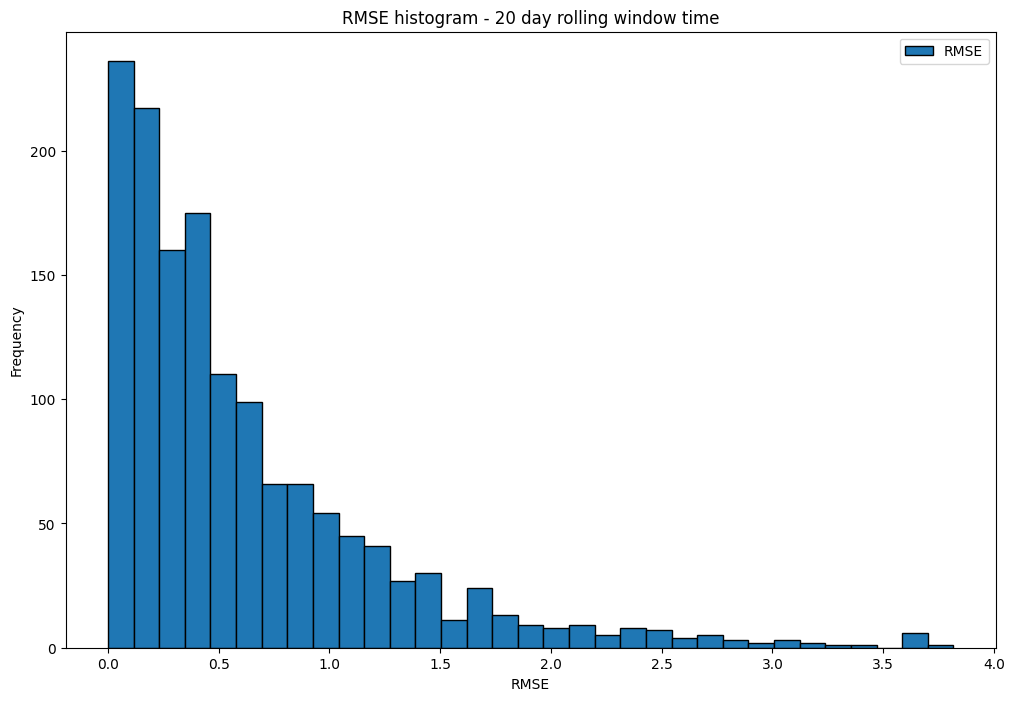

In [15]:
# Create lists to store results
results = []
rmse_list = []

for i in range(len(asset_returns)+1):

  data_test= pd.DataFrame()
  data_train = pd.DataFrame()
  y_train = pd.DataFrame()
  X_train = pd.DataFrame()

  #Split data into two sets as a rolling window of 11 days (approx two weeks)
  data_test, data_train = [d for _, d in asset_returns.groupby((asset_returns.index <= i+20) & (asset_returns.index >= i))]
  data_test = data_test.iloc[0]

  # training data (Until September 29th, 2023)
  y_train = pd.DataFrame(data_train['AAPL_Lag1'])  # AAPL to predict
  X_train = pd.DataFrame(data_train.iloc[:, 1:])    # All instruments
  X_train = X_train[:-1] #Eliminate one row to match shapes with y


  # testing data (October 1st - Nov 3rd, 2023)
  y_test = float(data_test.iloc[1:2])  # AAPL = N-th Asset. We shift ahead to make y_t regression on x_t-1
  # X_test = pd.DataFrame(data_test.iloc[:, 1:])    # All 20 instruments
  # X_test = X_test[:-1]#Eliminate one row to match shapes with y

  unconditionalprob_df_train = pd.DataFrame(columns=['UnconditionalP_t_train'])

  for df in dataframes:
    UnconditionalP_t = len(X_train.loc[X_train[df.Name] > 0])/len(X_train)
    unconditionalprob_df_train.loc[df.Name] = UnconditionalP_t

  ConditionalP = 1
  dfs = X_train.copy()

  for df in dataframes:

    if(df.Name != 'AAPL_Lag1' and df.Name != 'AAPL'):
      dfs = dfs.loc[dfs[df.Name] > 0].copy()
    # dfs = dfs.loc[dfs['AAPL_Lag1']].copy()

  dfs = dfs.loc[dfs['AAPL_Lag1'] > 0].copy()
  ConditionalP = len(dfs)/len(X_train)
  # print(dfs)

  denominator = 1

  for df in dataframes:

    if(df.Name != 'AAPL_Lag1' and df.Name != 'AAPL'):

      denominator *= unconditionalprob_df_train.loc[df.Name]

  #P(X|A1,A2,...A5) = P(A1,A2,...A5 | X) P(X) / [P(A1) P(A2) … P(A5)]
  AAPL_predict = ConditionalP * unconditionalprob_df_train.loc['AAPL_Lag1'] / denominator

  if(data_train.tail(1).index[0] == len(asset_returns)-1):
    break

  # Append results to the list
  results.append({
      'Index_start:' : i,
      'Index_end:' : data_train.tail(1).index[0],
      'P(X):': float(unconditionalprob_df_train.loc['AAPL_Lag1']),
      'P(A1,A2,...A5 | X):': float(ConditionalP),
      '[P(A1) P(A2) … P(A5)] denominator': float(denominator),
      'P(predict)=P(X|A1,A2,...A5):': float(AAPL_predict),
      'P(actual):' : float(unconditionalprob_df_train.loc['AAPL']),
  })

  rmse_list.append((float(unconditionalprob_df_train.loc['AAPL'])-float(AAPL_predict))**2)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


# Display the DataFrame

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
  print(results_df.to_string(index=False))

rmse_list = np.sqrt(rmse_list)

# Plot RMSE values
plt.figure(figsize=(12, 8))  # Set the figure size (width, height)
plt.hist(rmse_list, label='RMSE',bins='auto', edgecolor='black')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('RMSE histogram - 20 day rolling window time')
plt.legend()
plt.show()

# print(X_train)
# print('P(A1,A2,...A19 | X): %s' % ConditionalP)
# print('[P(A1) P(A2) … P(A19)] denominator %s' % denominator)
# print('P(X|A1,A2,...A19): %s' % AAPL_predict)
# print('P(X)')
# print(unconditionalprob_df_train)

$\text{We start to see that theres a closer relationship amongst the top stocks in the S&P 500 .}$

$\text{We will proceed to repeat the analysis with only the top 3 stocks in the S&P 500 by Market Cap. Just for good measure.}$

#Sample 3
**Stocks chosen:** AAPL, AMZN, MSFT

**Stock to be predicted:** AAPL

**Time series:**

Start = 1/1/2018

End = 11/04/2023

In [16]:
# creating pandas dataframe for each stock

path = '/content/drive/MyDrive/ORIE5258 - Python for Finance/HW3/'

AAPL = pd.read_csv(path + 'AAPL.csv')
AAPL.Name = 'AAPL'
AMZN = pd.read_csv(path + 'AMZN.csv')
AMZN.Name = 'AMZN'
MSFT = pd.read_csv(path + 'MSFT.csv')
MSFT.Name = 'MSFT'

In [17]:
# List of stocks
dataframes = [AAPL, AMZN, MSFT]

# Filter Adj Cls for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close']

In [18]:
# Merge DataFrames for all asset prices
for df in dataframes:
  asset_prices = pd.concat([AAPL['Date'], AAPL['AAPL'], AMZN['AMZN'], MSFT['MSFT']], axis=1)

# Calculate returns data for 1 day window

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close'].shift(-1) / df['Adj Close'] - 1



In [19]:
# Merge DataFrames for all asset returns
asset_returns = pd.concat([AAPL['Date'].shift(-1), AAPL['AAPL'].shift(1),
                           AAPL['AAPL'], AMZN['AMZN'], MSFT['MSFT']], axis=1)

# Rename the lagged column for AAPL
asset_returns.columns.values[1] = 'AAPL_Lag1'
AAPL_Lag1 = AAPL.shift(1)
AAPL_Lag1.Name = 'AAPL_Lag1'
dataframes.append(AAPL_Lag1)
# Fill NaN values with zeros
asset_returns = asset_returns.fillna(0)

#Remove the first line because AAPL_Lag1 has a zero there
asset_returns = asset_returns.iloc[1:]

#Remove the last line because its filled with zeros
asset_returns = asset_returns.iloc[:-1]

# Print the asset returns
print(asset_returns.iloc[:, :])


            Date  AAPL_Lag1      AAPL      AMZN      MSFT
1     2018-01-04  -0.000174  0.004645  0.004476  0.008802
2     2018-01-05   0.004645  0.011386  0.016163  0.012398
3     2018-01-08   0.011386 -0.003714  0.014425  0.001020
4     2018-01-09  -0.003714 -0.000115  0.004676 -0.000680
5     2018-01-10  -0.000115 -0.000229  0.001301 -0.004534
...          ...        ...       ...       ...       ...
1465  2023-10-30   0.007969  0.012305  0.038907  0.022740
1466  2023-10-31   0.012305  0.002819  0.002863  0.002372
1467  2023-11-01   0.002819  0.018739  0.029379  0.023543
1468  2023-11-02   0.018739  0.020693  0.007810  0.006502
1469  2023-11-03   0.020693 -0.005181  0.003839  0.012862

[1469 rows x 5 columns]


 Index_start:  Index_end:    P(X):  P(A1,A2,...A5 | X):  [P(A1) P(A2) … P(A5)] denominator  P(predict)=P(X|A1,A2,...A5):  P(actual):
            0          20 0.421053             0.157895                           0.457064                      0.145455    0.473684
            1          21 0.450000             0.150000                           0.412500                      0.163636    0.500000
            2          22 0.500000             0.150000                           0.375000                      0.200000    0.450000
            3          23 0.450000             0.100000                           0.315000                      0.142857    0.400000
            4          24 0.400000             0.050000                           0.315000                      0.063492    0.450000
            5          25 0.450000             0.050000                           0.292500                      0.076923    0.450000
            6          26 0.450000             0.050000              

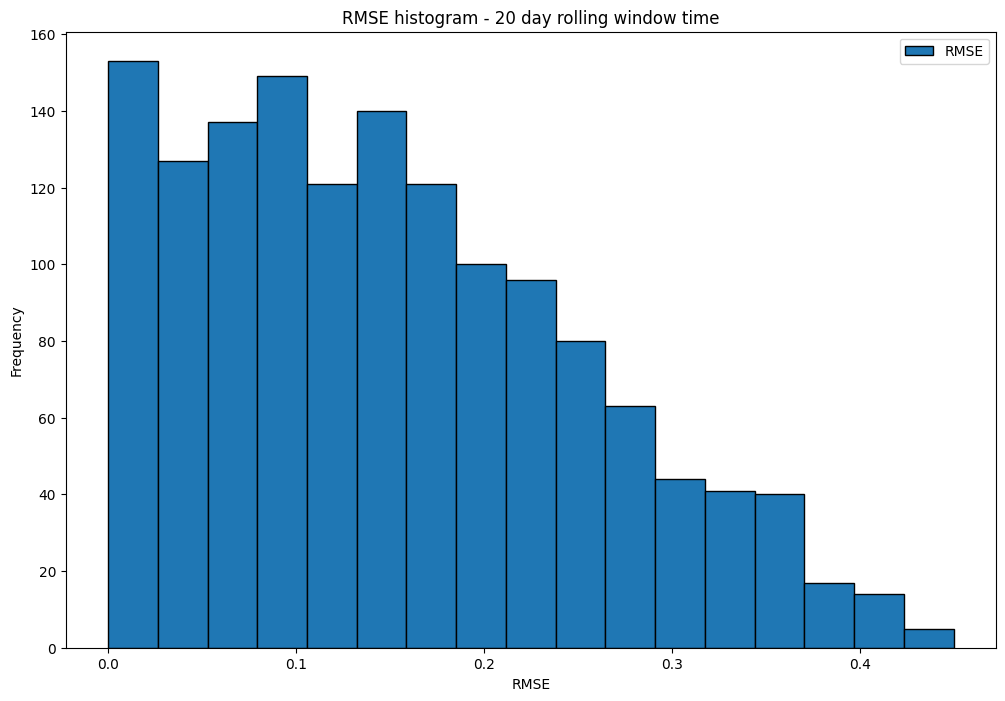

In [20]:
# Create lists to store results
results = []
rmse_list = []

for i in range(len(asset_returns)+1):

  data_test= pd.DataFrame()
  data_train = pd.DataFrame()
  y_train = pd.DataFrame()
  X_train = pd.DataFrame()

  #Split data into two sets as a rolling window of 11 days (approx two weeks)
  data_test, data_train = [d for _, d in asset_returns.groupby((asset_returns.index <= i+20) & (asset_returns.index >= i))]
  data_test = data_test.iloc[0]

  # training data (Until September 29th, 2023)
  y_train = pd.DataFrame(data_train['AAPL_Lag1'])  # AAPL to predict
  X_train = pd.DataFrame(data_train.iloc[:, 1:])    # All instruments
  X_train = X_train[:-1] #Eliminate one row to match shapes with y


  # testing data (October 1st - Nov 3rd, 2023)
  y_test = float(data_test.iloc[1:2])  # AAPL = N-th Asset. We shift ahead to make y_t regression on x_t-1
  # X_test = pd.DataFrame(data_test.iloc[:, 1:])    # All 20 instruments
  # X_test = X_test[:-1]#Eliminate one row to match shapes with y

  unconditionalprob_df_train = pd.DataFrame(columns=['UnconditionalP_t_train'])

  for df in dataframes:
    UnconditionalP_t = len(X_train.loc[X_train[df.Name] > 0])/len(X_train)
    unconditionalprob_df_train.loc[df.Name] = UnconditionalP_t

  ConditionalP = 1
  dfs = X_train.copy()

  for df in dataframes:

    if(df.Name != 'AAPL_Lag1' and df.Name != 'AAPL'):
      dfs = dfs.loc[dfs[df.Name] > 0].copy()
    # dfs = dfs.loc[dfs['AAPL_Lag1']].copy()

  dfs = dfs.loc[dfs['AAPL_Lag1'] > 0].copy()
  ConditionalP = len(dfs)/len(X_train)
  # print(dfs)

  denominator = 1

  for df in dataframes:

    if(df.Name != 'AAPL_Lag1' and df.Name != 'AAPL'):

      denominator *= unconditionalprob_df_train.loc[df.Name]

  #P(X|A1,A2,...A5) = P(A1,A2,...A5 | X) P(X) / [P(A1) P(A2) … P(A5)]
  AAPL_predict = ConditionalP * unconditionalprob_df_train.loc['AAPL_Lag1'] / denominator

  if(data_train.tail(1).index[0] == len(asset_returns)-1):
    break

  # Append results to the list
  results.append({
      'Index_start:' : i,
      'Index_end:' : data_train.tail(1).index[0],
      'P(X):': float(unconditionalprob_df_train.loc['AAPL_Lag1']),
      'P(A1,A2,...A5 | X):': float(ConditionalP),
      '[P(A1) P(A2) … P(A5)] denominator': float(denominator),
      'P(predict)=P(X|A1,A2,...A5):': float(AAPL_predict),
      'P(actual):' : float(unconditionalprob_df_train.loc['AAPL']),
  })

  rmse_list.append((float(unconditionalprob_df_train.loc['AAPL'])-float(AAPL_predict))**2)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


# Display the DataFrame

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
  print(results_df.to_string(index=False))

rmse_list = np.sqrt(rmse_list)

# Plot RMSE values
plt.figure(figsize=(12, 8))  # Set the figure size (width, height)
plt.hist(rmse_list, label='RMSE',bins='auto', edgecolor='black')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('RMSE histogram - 20 day rolling window time')
plt.legend()
plt.show()

# print(X_train)
# print('P(A1,A2,...A19 | X): %s' % ConditionalP)
# print('[P(A1) P(A2) … P(A19)] denominator %s' % denominator)
# print('P(X|A1,A2,...A19): %s' % AAPL_predict)
# print('P(X)')
# print(unconditionalprob_df_train)

$\text{We see better results with a smaller sample.}$